### 필요 라이브러리 설치 및 불러오기




In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize,sent_tokenize
import re # regular expression libary.
import nltk # Natural Language toolkit
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
import sklearn.metrics 
import string
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import warnings
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
warnings.filterwarnings(action='ignore')
from wordcloud import WordCloud
from collections import Counter
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aytekin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aytekin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aytekin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aytekin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# EDA

In [6]:
df = pd.read_csv('data/7allV03.csv',encoding='utf-8')
print(df.shape)
df.head()

(4900, 2)


,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...


In [7]:
df['category'].unique()

array(['siyaset ', 'dunya ', 'ekonomi ', 'kultur ', 'saglik ', 'spor ',
       'teknoloji '], dtype=object)

In [8]:
# 결측치 제거 -> 결측치 없음
df.isna().sum()

category    0
text        0
dtype: int64

In [9]:
# 중복값 제거
print(df.duplicated().sum())
df = df.drop_duplicates()
df.shape

360


(4540, 2)

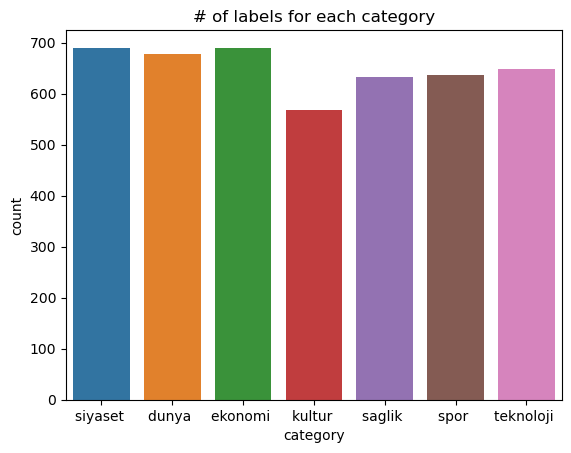

총 레이블 수 7
총 데이터 수 4540


In [10]:
sns.countplot("category",data=df)
plt.title('# of labels for each category')
plt.show() # balanced label
s = df['category'].nunique() # number of labels
n = df.shape[0]
print(f'총 레이블 수 {s}')
print(f'총 데이터 수 {n}')

In [11]:
df['length'] = [len(review) for review in df['text']]
print('길이 평균 : {}'.format(np.mean(df['length'])))
print('길이 최대 : {}'.format(np.max(df['length'])))
print('길이 최소 : {}'.format(np.min(df['length'])))

길이 평균 : 1980.8420704845814
길이 최대 : 19383
길이 최소 : 72


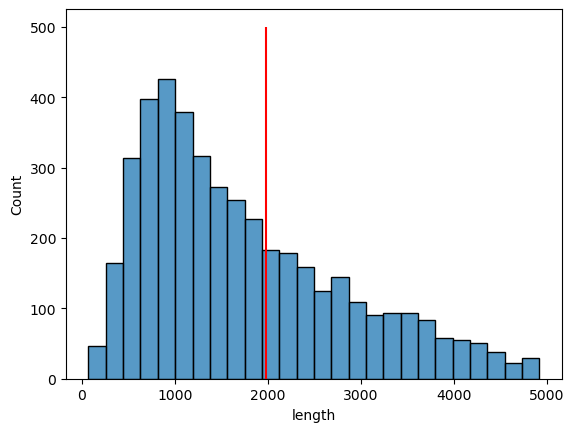

In [12]:
sns.histplot(df['length'][df['length'] < df['length'].quantile(0.95)])
plt.vlines(np.mean(df['length']),0,500,colors='red')
plt.show()

# Prerocessing

In [13]:
text_list=[]

for text in tqdm(df.text):
    text = text.lower()  #Büyük harften -Küçük harfe çevirme
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]"," ",text)
    text = nltk.word_tokenize(text) # splits the words that are in the sentence from each other.
    text = [word for word in text if not word in set(stopwords.words("turkish"))] # remove stopword 
    text = " ".join(text)
    text_list.append(text) # store sentences in list

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4540/4540 [03:20<00:00, 22.62it/s]


In [14]:
df['cleaned_text'] = text_list
df.head()

,category,text,length,cleaned_text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...,6676,milyon ön seçim vaadi mhp nin olağan büyük kur...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...,3313,mesut yılmaz yüce divan ceza alabilirdi prof d...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...,5434,disko lar kaldırılıyor başbakan yardımcısı arı...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...,658,sarıgül anayasa mahkemesi gidiyor mustafa sarı...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...,1575,erdoğan idamın bir haklılık sebebi var demek y...


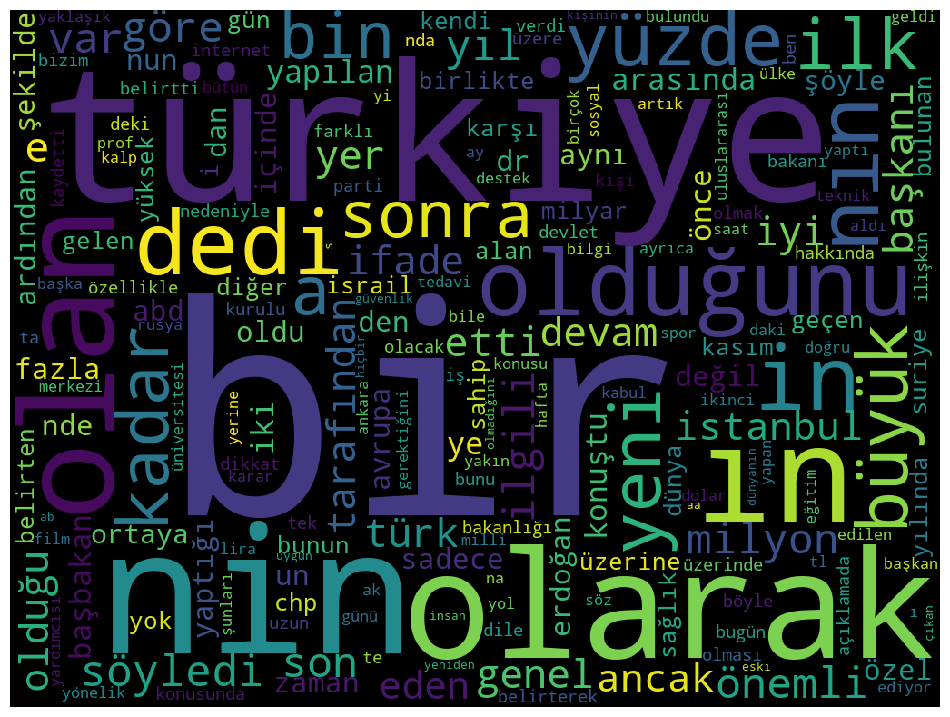

In [15]:
# word cloud for total text
c = Counter(' '.join(text_list).split())

wc = WordCloud(background_color="black",width=1024,height=768).generate_from_frequencies(c)
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(wc, interpolation='nearest')
plt.show()

siyaset 


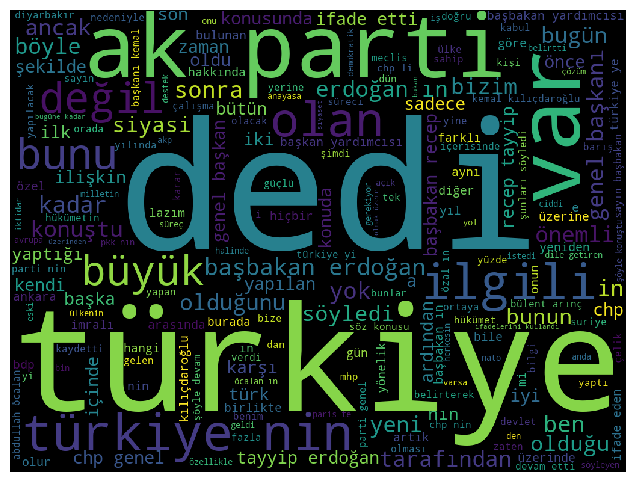

dunya 


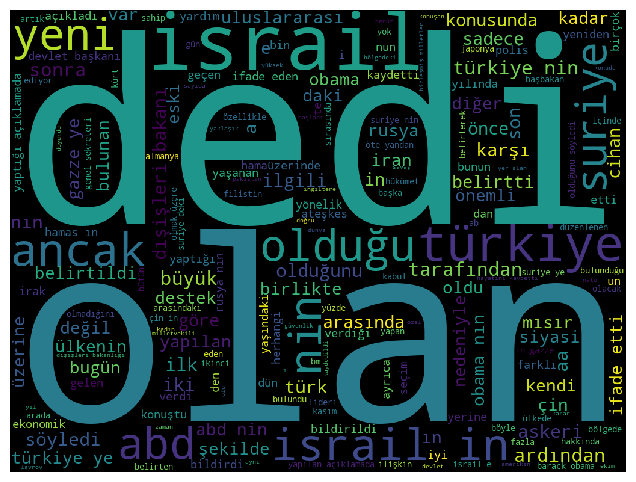

ekonomi 


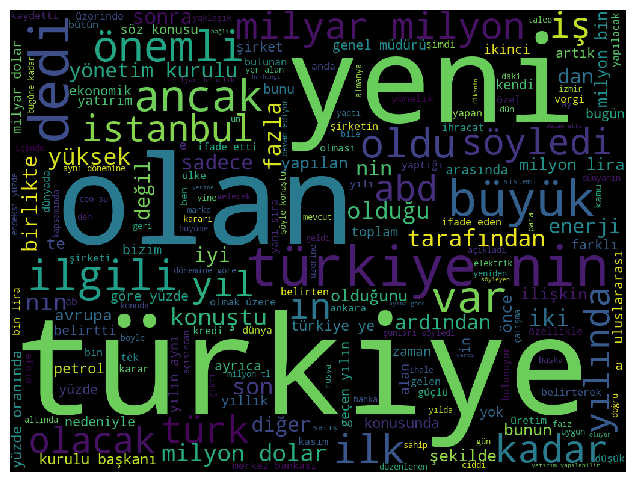

kultur 


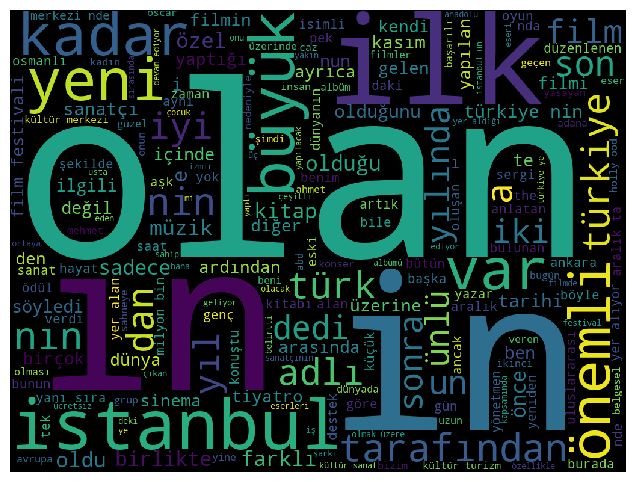

saglik 


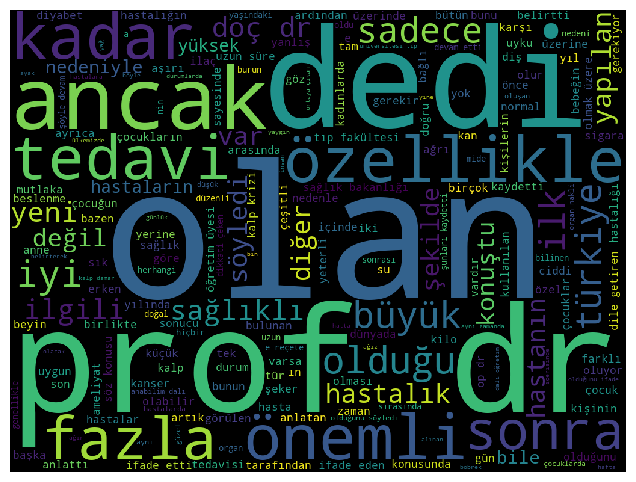

spor 


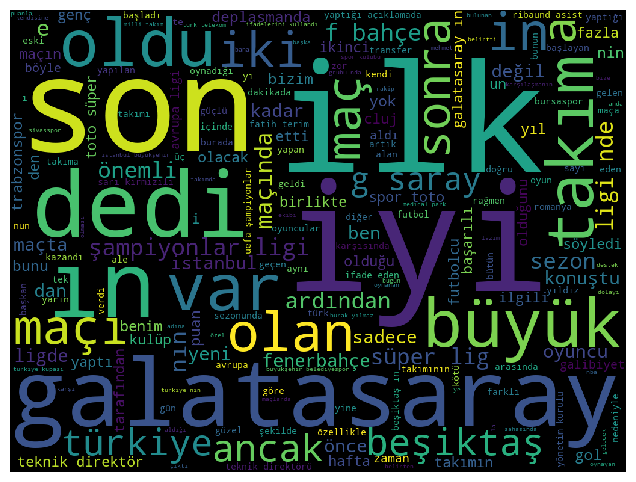

teknoloji 


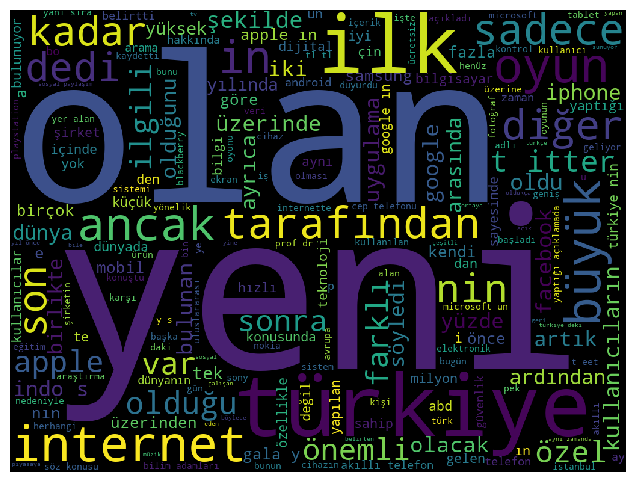

In [16]:
# word cloud for each category

# added some kelime for Stopword set. for better result.
SW = set()
for i in stopwords.words('turkish'):
    SW.add(i)
SW.add('bir')
SW.add('olarak')

for category in df['category'].unique():
    print(category)
    temp = df[df['category'] == category]
    text = " ".join(i for i in temp['cleaned_text'])
    wordcloud = WordCloud(stopwords=SW, background_color="black",width=1024,height=768).generate(text)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='nearest')
    plt.axis("off")
    plt.show()

In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.category)
labels = le.transform(df.category)
df['label'] = labels
df.head()

,category,text,length,cleaned_text,label
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...,6676,milyon ön seçim vaadi mhp nin olağan büyük kur...,4
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...,3313,mesut yılmaz yüce divan ceza alabilirdi prof d...,4
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...,5434,disko lar kaldırılıyor başbakan yardımcısı arı...,4
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...,658,sarıgül anayasa mahkemesi gidiyor mustafa sarı...,4
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...,1575,erdoğan idamın bir haklılık sebebi var demek y...,4


In [18]:
# data split for train and test

train, test = train_test_split(df, test_size=0.2, random_state=42)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print(train.shape)
print(test.shape)

(3632, 5)
(908, 5)


In [19]:
train.head()

,category,text,length,cleaned_text,label
0,kultur,7 yaşındaki mercan a büyük ödül almanya nın e...,2202,yaşındaki mercan a büyük ödül almanya nın önem...,2
1,teknoloji,facebook kullanıcıları dikkat ! facebook un y...,1403,facebook kullanıcıları dikkat facebook un yeni...,6
2,saglik,organ bağışı vasiyeti herkesin cebinde olacak...,4639,organ bağışı vasiyeti herkesin cebinde olacak ...,3
3,ekonomi,çeyrek altın kaç lira istanbul_kapalıçarşı da...,559,çeyrek altın kaç lira istanbul kapalıçarşı aya...,1
4,ekonomi,borsa güne yükselişle başladı istanbul_menkul...,652,borsa güne yükselişle başladı istanbul menkul ...,1


In [20]:
test.head()

,category,text,length,cleaned_text,label
0,ekonomi,hollanda türkiye  nin büyümesini kıskanıyoru...,1694,hollanda türkiye nin büyümesini kıskanıyoruz h...,1
1,ekonomi,komşu türk turist çekmek için camileri bile o...,2007,komşu türk turist çekmek camileri bile onaraca...,1
2,kultur,ünlü eser sakıncalı bulundu izmir il milli_eğ...,1048,ünlü eser sakıncalı bulundu izmir il milli eği...,2
3,spor,ronaldo ile kıyaslanmaktan sıkılmış ! dünyanı...,1141,ronaldo kıyaslanmaktan sıkılmış dünyanın iyi i...,5
4,dunya,meksika da deprem meksika nın güneyinde şidde...,284,meksika deprem meksika nın güneyinde şiddetli ...,0


# modeling & evalutaion

## 1. ML - RandomForest

    CounterVectorizer vs TfidfVectorizer


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

MAX_FEATURES = 1000

pipeline1 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf',RandomForestClassifier(random_state=42))
])
pipeline2 = Pipeline([
    ('vect', CountVectorizer(max_features=MAX_FEATURES)),
    ('clf',RandomForestClassifier(random_state=42))
])
pipeline3 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf',RandomForestClassifier(random_state=42))
])
pipeline4 = Pipeline([
    ('vect', TfidfVectorizer(max_features=MAX_FEATURES)),
    ('clf',RandomForestClassifier(random_state=42))
])

pipelines = [pipeline1, pipeline2, pipeline3, pipeline4]

for pipeline in tqdm(pipelines):
    pipeline.fit(train['cleaned_text'],train['label'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:16<00:00,  4.05s/it]


In [ ]:
# tdm 차원 차이 확인
# max_feature를 지정해주지 않았을 때
cv = CountVectorizer()
tdm = cv.fit_transform(df['text'])
print(tdm.shape)
# max_feature = 1000일때
cv = CountVectorizer(max_features=1000)
tdm = cv.fit_transform(df['text'])
print(tdm.shape)

(4540, 110917)
(4540, 1000)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

for pipeline in pipelines:
    y_preds = pipeline.predict(test['text'])
    f1_score_ = f1_score(test['label'],y_preds, average='weighted')
    accuracy_score_ = accuracy_score(test['label'],y_preds)
    print(pipeline)
    print(f'f1_score : {f1_score_}')
    print(f'acc_score : {accuracy_score_}')
    print('***'*30, '\n')

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf', RandomForestClassifier(random_state=42))])
f1_score : 0.8516704119698174
acc_score : 0.8513215859030837
****************************************************************************************** 

Pipeline(steps=[('vect', CountVectorizer(max_features=1000)),
                ('clf', RandomForestClassifier(random_state=42))])
f1_score : 0.7906718779172339
acc_score : 0.789647577092511
****************************************************************************************** 

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state=42))])
f1_score : 0.8446461603468288
acc_score : 0.8447136563876652
****************************************************************************************** 

Pipeline(steps=[('vect', TfidfVectorizer(max_features=1000)),
                ('clf', RandomForestClassifier(random_state=42))])
f1_score : 0.7994733498014117
acc_score : 0.7984581497797

In [ ]:
print('best model')
y_preds = pipeline1.predict(test['text'])
f1_score_ = f1_score(test['label'],y_preds, average='weighted')
accuracy_score_ = accuracy_score(test['label'],y_preds)
print(pipeline1)
print()
print(f'f1_score : {f1_score_}')
print(f'f1_score : {accuracy_score_}')

best model
Pipeline(steps=[('vect', CountVectorizer()),
                ('clf', RandomForestClassifier(random_state=42))])

f1_score : 0.8516704119698174
f1_score : 0.8513215859030837


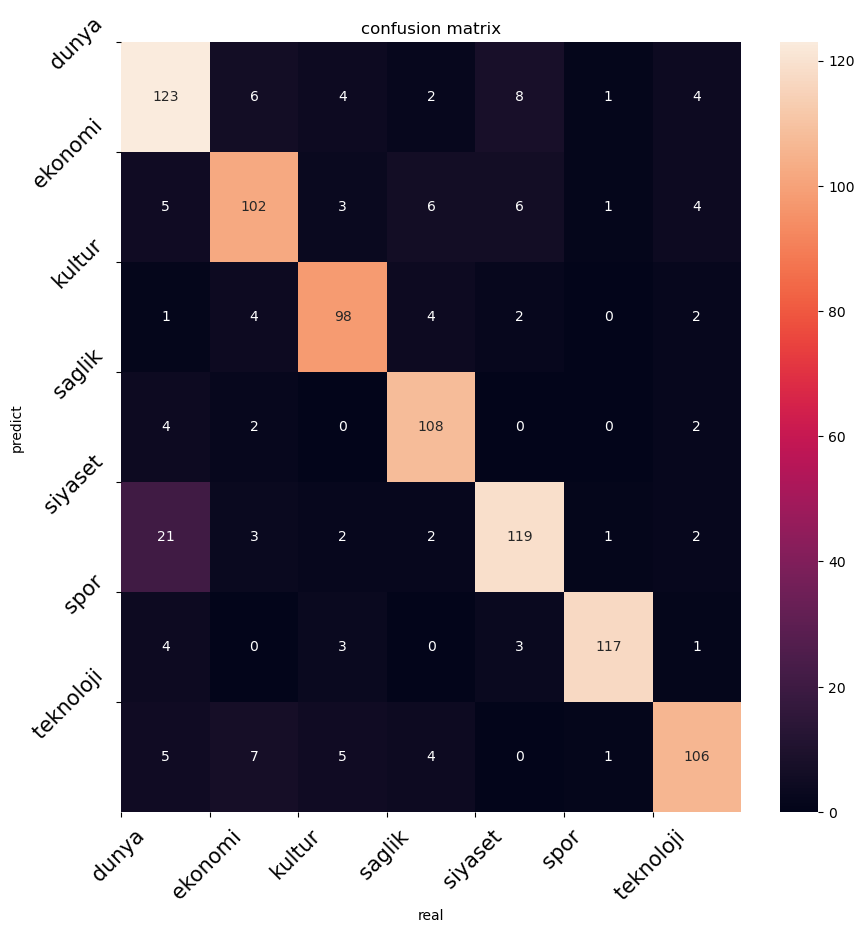

In [ ]:
y_pred=pipeline1.predict(test['text'])

# confusion matrix
plt.figure(figsize=(10,10))
cm=confusion_matrix(test['label'],y_preds)
plt.title('confusion matrix')
sns.heatmap(cm,annot=True,fmt='d') 
plt.xticks(np.arange(0,7),le.classes_, size=15, rotation=45)
plt.yticks(np.arange(0,7),le.classes_, size=15, rotation=45)
plt.xlabel('real')
plt.ylabel('predict')
plt.show()

In [ ]:
pipe = Pipeline([
    ('vect',CountVectorizer()),
    ('clf',RandomForestClassifier(random_state=42))
])

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'clf__bootstrap', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__max_samples', 'clf__min_impurity_decrease', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__n_estimators', 'clf__n_jobs', 'clf__oob_score', 'clf__random_state', 'clf__verbose', 'clf__warm_start'])

In [ ]:
# model fine tuning
from sklearn.model_selection import RandomizedSearchCV

pipe = Pipeline([
    ('vect',CountVectorizer()),
    ('clf',RandomForestClassifier(random_state=42))
])

params={'vect':[CountVectorizer(), TfidfVectorizer()],
        'clf__n_estimators':[100, 500, 1000],
        "clf__max_features":['sqrt', 'log2'],
        'clf__max_depth':[None, 50, 100, 300],
        'clf__criterion':['gini', 'entropy', 'log_loss']
        }

clf1 = RandomizedSearchCV(
    pipeline,
    param_distributions = params,
    n_iter = 1000,
    cv = 5,
    verbose=3,
    random_state=42
)

clf1.fit(train['cleaned_text'],train['label'])

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=sqrt, clf__n_estimators=100, vect=CountVectorizer();, score=0.828 total time=   3.7s
[CV 2/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=sqrt, clf__n_estimators=100, vect=CountVectorizer();, score=0.857 total time=   4.0s
[CV 3/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=sqrt, clf__n_estimators=100, vect=CountVectorizer();, score=0.855 total time=   3.7s
[CV 4/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=sqrt, clf__n_estimators=100, vect=CountVectorizer();, score=0.871 total time=   3.9s
[CV 5/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=sqrt, clf__n_estimators=100, vect=CountVectorizer();, score=0.865 total time=   4.0s
[CV 1/5] END clf__criterion=gini, clf__max_depth=None, clf__max_features=sqrt, clf__n_estimators=100, vect=TfidfVectorizer();, score=0.827 total ti

In [ ]:
print('best model')
y_preds = clf1.predict(test['text'])
f1_score_ = f1_score(test['label'],y_preds, average='weighted')
accuracy_score_ = accuracy_score(test['label'],y_preds)
print(clf1.best_params_)
print()
print('검증 정확도:', clf1.best_score_)
print(f'test_f1_score : {f1_score_}')
print(f'test_acc : {accuracy_score_}')

best model
{'clf__n_estimators': 500, 'clf__max_features': 'log2', 'clf__max_depth': 100, 'clf__criterion': 'gini'}

검증 정확도: 0.8466440066540104
test_f1_score : 0.832149951869797
test_acc : 0.8314977973568282


## 2. Fasttext



In [ ]:
#Data prepare for fasttext format for train
train["label_format"]=0
for i in range(len(train)):
    train.label_format[i]="__label__"+str(train.category[i])+" "+str(train.cleaned_text[i])

#Data prepare for fasttext format for test
test["label_format"]=0
for i in range(len(test)):
    test.label_format[i]="__label__"+str(test.category[i])+" "+str(test.cleaned_text[i])

fasttext에서는 라벨값을 ' __ label __ [카테고리명]' 이런 식으로 인식한다

라이브러리 요구사항에 맞게 전처리를 해주어야 함.

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
train['label_format'].to_csv('fasttext_train.txt',index=None,header=None)
test['label_format'].to_csv('fasttext_test.txt',index=None,header=None)

In [ ]:
#train classifier model
model_fasttext = fasttext.train_supervised('fasttext_train.txt',
                                           epoch=100,
                                           lr=0.05,
                                           label_prefix='__label__',
                                           dim=1000)

In [ ]:
model_fasttext.save_model("clf_model_turkish.bin")

학습된 모델 점수 및 성능확인

In [ ]:
print(test['category'][0])
print(test['cleaned_text'][0])
print(model_fasttext.predict(test['cleaned_text'][0]))

In [ ]:
# test score
train_score = model_fasttext.test('fasttext_train.txt')
test_score = model_fasttext.test('fasttext_test.txt')

print("train Precision at 1 : {}, recall at 1 : {}:".format(train_score[1], train_score[2]))
print("test Precision at 1 : {}, recall at 1 : {}:".format(test_score[1], test_score[2]))

In [ ]:
# wordNgram = unigram + lr =0.05
y_test = test['label']

y_pred_label = []
for text in test['cleaned_text']:
    text = model_fasttext.predict(text)[0][0][9:] + ' '
    y_pred_label.append(text)
    y_pred = le.transform(y_pred_label)
print(sklearn.metrics.classification_report(y_test, y_pred, digits=4))

In [ ]:
# confusion matrix
plt.figure(figsize=(10,10))
cm=confusion_matrix(y_test,y_pred)
plt.title('confusion matrix')
sns.heatmap(cm,annot=True,fmt='d') 
plt.xticks(np.arange(0,7),le.classes_, size=15, rotation=45)
plt.yticks(np.arange(0,7),le.classes_, size=15, rotation=45)
plt.xlabel('real')
plt.ylabel('predict')
plt.show()

## LSTM

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42,shuffle=True)
print(len(X_train)) # 3920 sentences
print(len(y_train)) #3920 Labels
print(len(X_test))  # 980 sentences
print(len(y_test)) # 980 labels

3632
3632
908
908


In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

max_lenght=100

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index # creating word dict for words in training

sequences = tokenizer.texts_to_sequences(X_train)  # replacing words with the number corresponding to them in the dictionary(word_index)

X_train_padded = pad_sequences(sequences, padding='post',maxlen=max_lenght) # padding words

print(len(word_index)) # I have 94836 words in my dictionary

94781


In [55]:
print("Original Version:",X_train.iloc[0])
print("\n---------------------------------\n")
print("Tokenized version:",sequences[0])  # change words with number that corresponding to word word_index
print("\n---------------------------------\n")
print("Padded version",X_train_padded[0]) 
print("\n---------------------------------\n")
print("Shape after the padding:",X_train_padded.shape)

Original Version: yaşındaki mercan a büyük ödül almanya nın önemli medya ödülü olarak kabul edilen bambi ödülleri düsseldorf kentinde düzenlenen törenle yılki sahiplerini buldu hubert burda media yayın kuruluşu tarafından düzenlenen törende christian zübert in dreiviertelmond filminde hayat adlı türk kızını canlandıran yaşındaki mercan fatma türkoğlu yetenek bambi ödülüne layık görüldü minik mercan sahneye gelerek anneme okuluma öğretmenlerime bana bugün burada olmama izin verdikleri teşekkür ediyorum dedi mercan fatma türkoğlu ödülünü kendi yaşıtı olan kendisi oyunculuk yapan nina eichinger den aldı geceden kareler foto galeri yeni başlayanlar türkçe adlı film ulusal film kategorisinde bambi ödülü alırken uyum dalındaki ödülü berlin sokak ortasında arap kökenli gençler tarafından dövülen haham daniel alter aldı yeni başlayanlar türkçe adlı filmin başrol oyuncusu adnan maral türkçe yaptığı teşekkür konuşmasında teşekkür ederim dedi alman birinci televizyonu ard tarafından naklen yayınl

In [56]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)  # replacing words with the number corresponding to them in the dictionary(word_index)
X_test_padded = pad_sequences(X_test_sequences, padding='post',maxlen=max_lenght) # padding words

In [57]:
print("Original Version:",X_test.iloc[0])
print("\n---------------------------------\n")
print("Tokenized version:",X_test_sequences[0])  # change words with number that corresponding to word word_index
print("\n---------------------------------\n")
print("Padded version",X_test_padded[0]) 
print("\n---------------------------------\n")
print("Shape after the padding:",X_test_padded.shape)

Original Version: hollanda türkiye nin büyümesini kıskanıyoruz hollanda başbakanı mark rutte türkiye nin hollanda nın önemli ticaret yatırım ortaklarından birisi olduğunu belirterek son yıl içinde türkiye ekonomisi büyük bir hızla büyüdü büyüme bizi kıskandırıyor dedi türkiye nin yumuşak inişi başardığını aktaran rutte türkiye halen yüzde e yakın bir büyüme kaydedebiliyor dedi iki ülkenin yıllık toplam ticaret hacminin yıllık milyar doların üzerinde olduğunu anlatan rutte cumhurbaşkanı abdullah gül başbakan recep tayyip erdoğan görüşmeler yaptık görüşmeler sadece politik meselelerden ibaret değildi aynı zamanda iki ülke arasındaki ticari ekonomik ilişkileri artırabileceğimizi görüştük konuştu rutte kredi derecelendirme kuruluşu fitch in türkiye hakkında yaptığı not artırımı dolayısıyla başbakan erdoğan ı tebrik ettiğini belirterek not artırımı türkiye güzel bir haber türkiye artık istikrarlı bir ortam sağlıyor konuştu milyar dolar başbakan yardımcısı ali babacan yılın türkiye hollanda 

In [58]:
y_train_label=np.asarray(y_train).reshape(-1,1)
y_test_label=np.asarray(y_test).reshape(-1,1)

In [59]:
import tensorflow as tf

vocab_size = len(tokenizer.word_index)+1
embedding_dim=16

model_lstm2 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
  tf.keras.layers.Dense(7, activation='softmax')
])

model_lstm2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_lstm2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           1516512   
                                                                 
 lstm_4 (LSTM)               (None, 128)               74240     
                                                                 
 dense_6 (Dense)             (None, 7)                 903       
                                                                 
Total params: 1,591,655
Trainable params: 1,591,655
Non-trainable params: 0
_________________________________________________________________


In [63]:
num_epochs = 10
BATCH_SIZE=64
history=model_lstm2.fit(X_train_padded,y_train_label,batch_size=BATCH_SIZE ,epochs=num_epochs, validation_data=(X_test_padded,y_test_label))

Epoch 1/10
57/57 [==============================] - 25s 387ms/step - loss: 1.9225 - accuracy: 0.1941 - val_loss: 1.9172 - val_accuracy: 0.2335
Epoch 2/10
57/57 [==============================] - 25s 443ms/step - loss: 1.7929 - accuracy: 0.3015 - val_loss: 1.6734 - val_accuracy: 0.2996
Epoch 3/10
57/57 [==============================] - 20s 342ms/step - loss: 1.4601 - accuracy: 0.3420 - val_loss: 1.6538 - val_accuracy: 0.2797
Epoch 4/10
57/57 [==============================] - 21s 363ms/step - loss: 1.2640 - accuracy: 0.4488 - val_loss: 1.4318 - val_accuracy: 0.4229
Epoch 5/10
57/57 [==============================] - 20s 347ms/step - loss: 1.0490 - accuracy: 0.5895 - val_loss: 1.4464 - val_accuracy: 0.4229
Epoch 6/10
57/57 [==============================] - 19s 339ms/step - loss: 0.8433 - accuracy: 0.6831 - val_loss: 1.3266 - val_accuracy: 0.4857
Epoch 7/10
57/57 [==============================] - 21s 369ms/step - loss: 0.5867 - accuracy: 0.7899 - val_loss: 1.2419 - val_accuracy: 0.5518

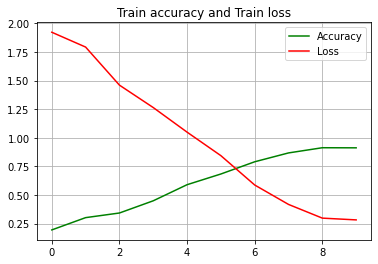

In [64]:
# model_lstm
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],color="green")
plt.plot(history.history["loss"],color="red")
plt.title("Train accuracy and Train loss")
plt.legend(["Accuracy","Loss"])
plt.grid()

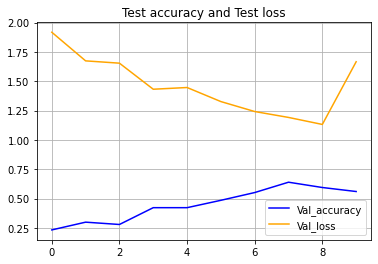

In [65]:
# model_lstm
plt.plot(history.history["val_accuracy"],color="blue")
plt.plot(history.history["val_loss"],color="orange")
plt.title("Test accuracy and Test loss")
plt.legend(["Val_accuracy","Val_loss"])
plt.grid()

In [66]:
print("Accuracy of the model on Training Data is - " , model_lstm2.evaluate(X_train_padded,y_train_label)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model_lstm2.evaluate(X_test_padded,y_test_label)[1]*100 , "%")

114/114 [==============================] - 3s 29ms/step - loss: 0.3299 - accuracy: 0.9012
Accuracy of the model on Training Data is -  90.11563658714294 %
29/29 [==============================] - 1s 29ms/step - loss: 1.6659 - accuracy: 0.5606
Accuracy of the model on Testing Data is -  56.057268381118774 %


29/29 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

           0      0.558     0.716     0.627       148
           1      0.493     0.520     0.506       127
           2      0.439     0.883     0.587       111
           3      0.984     0.543     0.700       116
           4      0.448     0.633     0.525       150
           5      1.000     0.477     0.646       128
           6      0.833     0.156     0.263       128

    accuracy                          0.561       908
   macro avg      0.679     0.561     0.550       908
weighted avg      0.672     0.561     0.549       908



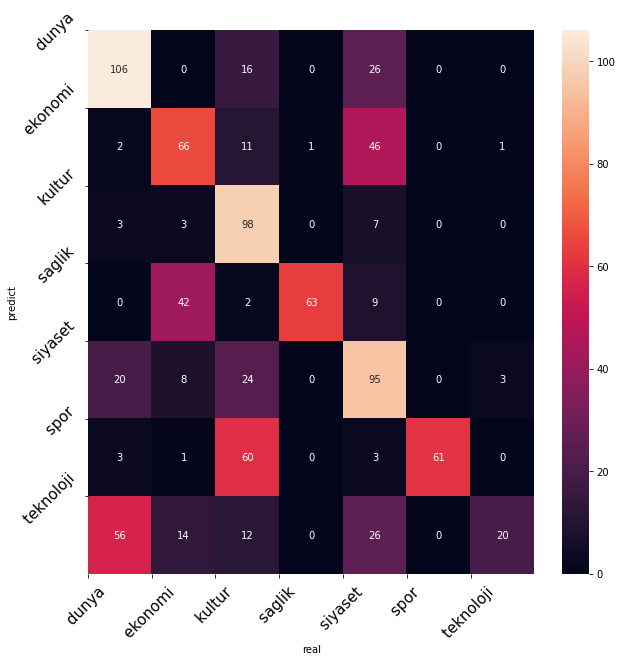

In [67]:
pred = np.argmax(model_lstm2.predict(X_test_padded),axis=1)
print(classification_report(y_test, pred, digits=3))
cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,linecolor="white",fmt='')
plt.xticks(np.arange(0,7),le.classes_, size=15, rotation=45)
plt.yticks(np.arange(0,7),le.classes_, size=15, rotation=45)
plt.xlabel('real')
plt.ylabel('predict')
plt.show()
# overfitted on training data

 LSTM model 2

In [68]:
import tensorflow as tf

vocab_size = len(tokenizer.word_index)+1
embedding_dim=16

model_lstm2 = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')
])

adam= tf.keras.optimizers.Adam(lr=0.01) 

model_lstm2.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model_lstm2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           1516512   
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              41472     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

In [69]:
num_epochs = 10
BATCH_SIZE=64
history2=model_lstm2.fit(X_train_padded,y_train_label,batch_size=BATCH_SIZE ,epochs=num_epochs, validation_data=(X_test_padded,y_test_label))

Epoch 1/10
57/57 [==============================] - 18s 28ms/step - loss: 1.8468 - accuracy: 0.3370 - val_loss: 1.6565 - val_accuracy: 0.3667
Epoch 2/10
57/57 [==============================] - 1s 13ms/step - loss: 0.5768 - accuracy: 0.8026 - val_loss: 1.3184 - val_accuracy: 0.4901
Epoch 3/10
57/57 [==============================] - 1s 13ms/step - loss: 0.1452 - accuracy: 0.9615 - val_loss: 1.1052 - val_accuracy: 0.5870
Epoch 4/10
57/57 [==============================] - 1s 13ms/step - loss: 0.0476 - accuracy: 0.9882 - val_loss: 0.9257 - val_accuracy: 0.6949
Epoch 5/10
57/57 [==============================] - 1s 13ms/step - loss: 0.0235 - accuracy: 0.9961 - val_loss: 0.8127 - val_accuracy: 0.7214
Epoch 6/10
57/57 [==============================] - 1s 13ms/step - loss: 0.0177 - accuracy: 0.9967 - val_loss: 0.8020 - val_accuracy: 0.7346
Epoch 7/10
57/57 [==============================] - 1s 13ms/step - loss: 0.0204 - accuracy: 0.9948 - val_loss: 1.0606 - val_accuracy: 0.6718
Epoch 8/10
5

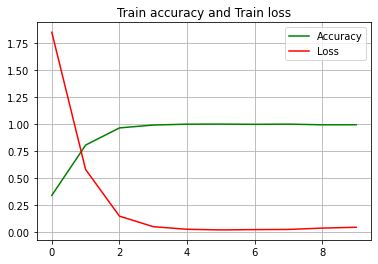

In [70]:
# model_lstm2
import matplotlib.pyplot as plt

plt.plot(history2.history["accuracy"],color="green")
plt.plot(history2.history["loss"],color="red")
plt.title("Train accuracy and Train loss")
plt.legend(["Accuracy","Loss"])
plt.grid()

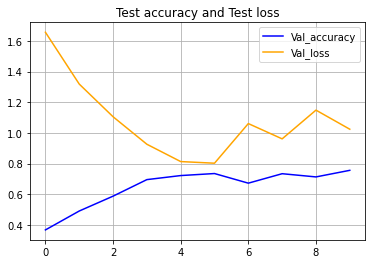

In [71]:
# model_lstm2
plt.plot(history2.history["val_accuracy"],color="blue")
plt.plot(history2.history["val_loss"],color="orange")
plt.title("Test accuracy and Test loss")
plt.legend(["Val_accuracy","Val_loss"])
plt.grid()

In [72]:
print("Accuracy of the model on Training Data is - " , model_lstm2.evaluate(X_train_padded,y_train_label)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model_lstm2.evaluate(X_test_padded,y_test_label)[1]*100 , "%")


114/114 [==============================] - 1s 5ms/step - loss: 0.0169 - accuracy: 0.9961
Accuracy of the model on Training Data is -  99.61453676223755 %
29/29 [==============================] - 0s 5ms/step - loss: 1.0238 - accuracy: 0.7555
Accuracy of the model on Testing Data is -  75.55066347122192 %


29/29 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0      0.767     0.669     0.715       148
           1      0.732     0.646     0.686       127
           2      0.659     0.748     0.700       111
           3      0.884     0.853     0.868       116
           4      0.693     0.753     0.722       150
           5      0.918     0.875     0.896       128
           6      0.681     0.766     0.721       128

    accuracy                          0.756       908
   macro avg      0.762     0.759     0.758       908
weighted avg      0.761     0.756     0.756       908



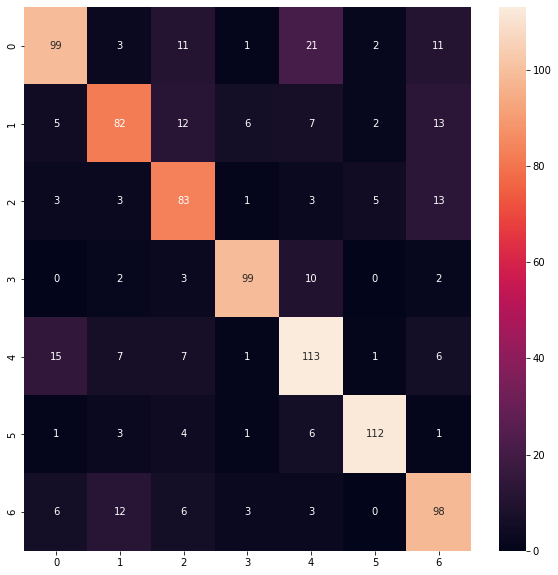

In [73]:
pred = np.argmax(model_lstm2.predict(X_test_padded),axis=1)
print(classification_report(y_test, pred, digits=3))
cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,linecolor="white",fmt='')
plt.show()
# overfitted on training data

## Deep learning - BERTurkish


In [21]:
from simpletransformers.classification import ClassificationModel
import torch
torch.cuda.is_available()

True

In [22]:
#for bert text column should be string and label column should be int
train["text"]=train["text"].apply(lambda r: str(r))
train['label']=train['label'].astype(int)

In [23]:
#create model with turkish bert - transfer learning
model = ClassificationModel('bert', 'dbmdz/bert-base-turkish-uncased', num_labels=7,use_cuda=True,
                            args={'reprocess_input_data': True, 
                                  'overwrite_output_dir': True, 
                                  'num_train_epochs': 3, 
                                  "train_batch_size": 64 , 
                                  "fp16":False,
                                  "output_dir": "bert_model",
                                 'wandb_project': 'project-name'})

Some weights of the model checkpoint at dbmdz/bert-base-turkish-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification wer

In [24]:
train = train[['text','label']]
test = test[['text','label']]

In [25]:
#train model
model.train_model(train)

  0%|          | 0/3632 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

wandb: Currently logged in as: aytekin827. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 3:   0%|          | 0/57 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/57 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/57 [00:00<?, ?it/s]

(171, 0.43795393897514595)

In [26]:
result, model_outputs, wrong_predictions = model.eval_model(test)

  0%|          | 0/908 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/114 [00:00<?, ?it/s]

Training loss,█▄▁
global_step,▁▅█
lr,█▅▁
Training loss,0.07747
global_step,150
lr,1e-05


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


In [31]:
predictions = model_outputs.argmax(axis=1)
actuals = test.label.values
print(classification_report(actuals, predictions, digits=3))
print(accuracy_score(actuals, predictions))
print(f1_score(actuals, predictions, average='weighted'))

              precision    recall  f1-score   support

           0      0.902     0.872     0.887       148
           1      0.861     0.780     0.818       127
           2      0.930     0.964     0.947       111
           3      0.940     0.948     0.944       116
           4      0.901     0.907     0.904       150
           5      0.977     0.992     0.984       128
           6      0.883     0.945     0.913       128

    accuracy                          0.913       908
   macro avg      0.913     0.915     0.914       908
weighted avg      0.912     0.913     0.912       908

0.9129955947136564
0.912129867964323
